<a href="https://colab.research.google.com/github/sujal-prakash15/Deep_learning/blob/master/NLTK_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [7]:
print(all_positive_tweets[0])

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)


In [6]:
print(all_negative_tweets[0])

hopeless for tmr :(


In [8]:
#anlysis of the structure of the dataset
print("Number of postive tweets",len(all_positive_tweets))
print("Number of negative tweets",len(all_negative_tweets))

print("type of all_postive_tweets",type(all_positive_tweets))
print("type of the tweet",type(all_negative_tweets[0]))

Number of postive tweets 5000
Number of negative tweets 5000
type of all_postive_tweets <class 'list'>
type of the tweet <class 'str'>


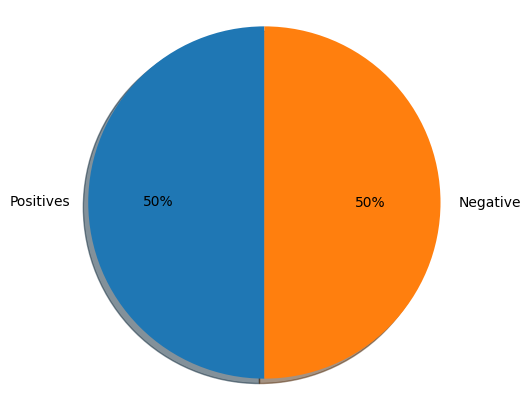

In [15]:
# Declare a figure with a custom size
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels,autopct='%1.0f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [18]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import colorama
from colorama import Fore,Back
import random
#printing random tweets to get a better understanding of the dataset structures
#printing postives in green
# print(Back.WHITE)
print(Fore.GREEN+ all_positive_tweets[random.randint(0,5000)])
#printing negatives in red
print(Fore.RED+ all_positive_tweets[random.randint(0,5000)])

@janevickers7 Hi Jane, this is a Silver-washed Fritillary :)
@bel_pearson Cricket World Cup, Asian cup state of origin... now this?! Wow Matt is a lucky boy :-) have fun!


In [26]:
#In the above output we could analyse and can tell that tweets contains urls and emoticons

## Preprocessing raw text for sentimental analysis



Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

    1) Tokenizing the string
    2) Lowercasing
    3) Removing stop words and punctuation
    4) Stemming

The videos explained each of these steps and why they are important. Let's see how we can do these to a given tweet. We will choose just one and see how this is transformed by each preprocessing step.


In [28]:
#this tweet is enough complex to understand all pre-process to be done
tweet=all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

## Remove hyperlinks, Twitter marks and styles
Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the re library to perform regular expression operations on our tweet. We'll define our search pattern and use the sub() method to remove matches by substituting with an empty character (i.e. '')

In [31]:
#removing hastags and urls
print(Fore.RED+tweet)
# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(Fore.BLUE+tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


## Tokenize the string
To tokenize means to split the strings into individual words without blanks or tabs. In this same step, we will also convert each word in the string to lower case. The tokenize module from NLTK allows us to do these easily:

In [33]:
print(Fore.RED + tweet2)

tokenizer=TweetTokenizer(preserve_case=False,reduce_len=True,strip_handles=True)
tweet_token=tokenizer.tokenize(tweet2)
print(Fore.BLUE)
print(tweet_token)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


## Remove Stop words and punctuations
The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [36]:
stop_words=stopwords.words('english')
print("stop words")
print(stop_words)

print("\n\npunctuations")
print(string.punctuation)

stop words
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so'



We can see that the stop words list above contains some words that could be important in some contexts. These could be words like i, not, between, because, won, against. You might need to customize the stop words list for some applications. For our exercise, we will use the entire list.

For the punctuation, we saw earlier that certain groupings like ':)' and '...' should be retained when dealing with tweets because they are used to express emotions. In other contexts, like medical analysis, these should also be removed.

Time to clean up our tokenized tweet!


In [38]:
print(tweet_token)
tweet_clean=[]
for x in tweet_token:
  if(x not in stop_words and x not in string.punctuation):
    tweet_clean.append(x)
print()
print("cleand tokens")
print(tweet_clean)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

cleand tokens
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']



## Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words:

    1) learn
    2) learning
    3) learned
    4) learnt

All these words are stemmed from its common root learn. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, happi and sunni. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

    1) happy
    2) happiness
    3) happier

We can see that the prefix happi is more commonly used. We cannot choose happ because it is the stem of unrelated words like happen.

NLTK has different modules for stemming and we will be using the PorterStemmer module which uses the Porter Stemming Algorithm. Let's see how we can use it in the cell below.


In [40]:
print(Fore.RED)
print(tweet_clean)
print(Fore.BLUE )
stemmer=PorterStemmer()
tweet_stem=[]
for x in tweet_clean:
  stem_word=stemmer.stem(x)
  tweet_stem.append(stem_word)
print(tweet_stem)


['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
